https://github.com/axium/CNN-For-End-to-End-Deblurring--Keras

In [0]:
from google.colab import files
uploaded = files.upload()

In [10]:
!ls

'CelebA Deblurring.ipynb'  'CelebA Images.zip'	 Results.png   wazir_model.h5
'CelebA Images'		    README.md		 sample_data


In [0]:
!rm -f celebA_deblur_cnn_weights.h5

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from skimage.io import imread
from glob import glob

In [3]:
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [0]:
clean_images_path = glob('./CelebA Images/Clean Images/*.png')
blurry_images_path = glob('./CelebA Images/Blurry Images/*.png')
Images = []; Blurry = []
for image, blurry in zip(clean_images_path, blurry_images_path):
    Images.append(imread(image))
    Blurry.append(imread(blurry))
Images = np.array(Images).astype('float32')
Blurry = np.array(Blurry).astype('float32')

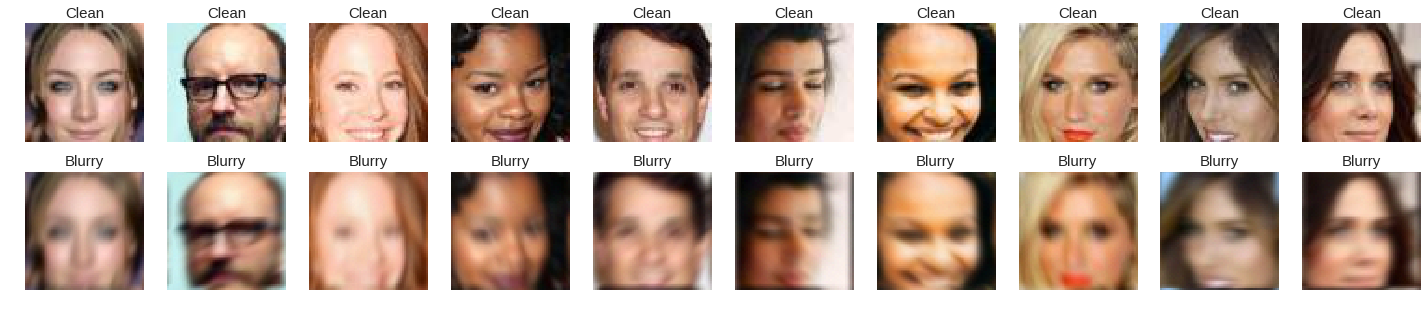

In [30]:
f, ax = plt.subplots(2,10,figsize=(25,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

In [6]:
Adeblur_CNN_input = Input(shape=(64,64,3))

#HIDDEN LAYERS
Adeblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(Adeblur_CNN_input)
Adeblur_CNN_layer1 = BatchNormalization()(Adeblur_CNN_layer1)
Adeblur_CNN_layer1 = Activation('relu')(Adeblur_CNN_layer1)

Adeblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(Adeblur_CNN_layer1)
Adeblur_CNN_layer2 = BatchNormalization()(Adeblur_CNN_layer2)
Adeblur_CNN_layer2 = Activation('relu')(Adeblur_CNN_layer2)

Adeblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(Adeblur_CNN_layer2)
Adeblur_CNN_layer1 = BatchNormalization()(Adeblur_CNN_layer3)
Adeblur_CNN_layer1 = Activation('relu')(Adeblur_CNN_layer3)

Adeblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(Adeblur_CNN_layer3)
Adeblur_CNN_layer4 = BatchNormalization()(Adeblur_CNN_layer4)
Adeblur_CNN_layer4 = Activation('relu')(Adeblur_CNN_layer4)

Adeblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(Adeblur_CNN_layer4)
Adeblur_CNN_layer5 = BatchNormalization()(Adeblur_CNN_layer5)
Adeblur_CNN_layer5 = Activation('relu')(Adeblur_CNN_layer5)

Adeblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(Adeblur_CNN_layer5)
Adeblur_CNN_layer6 = BatchNormalization()(Adeblur_CNN_layer6)
Adeblur_CNN_layer6 = Activation('relu')(Adeblur_CNN_layer6)

Adeblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(Adeblur_CNN_layer6)
Adeblur_CNN_layer7 = BatchNormalization()(Adeblur_CNN_layer7)
Adeblur_CNN_layer7 = Activation('relu')(Adeblur_CNN_layer7)

Adeblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(Adeblur_CNN_layer7)
Adeblur_CNN_layer8 = BatchNormalization()(Adeblur_CNN_layer8)
Adeblur_CNN_layer8 = Activation('relu')(Adeblur_CNN_layer8)

Adeblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(Adeblur_CNN_layer8)
Adeblur_CNN_layer9 = BatchNormalization()(Adeblur_CNN_layer9)
Adeblur_CNN_layer9 = Activation('relu')(Adeblur_CNN_layer9)

Adeblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(Adeblur_CNN_layer9)
Adeblur_CNN_layer10 = BatchNormalization()(Adeblur_CNN_layer10)
Adeblur_CNN_layer10 = Activation('relu')(Adeblur_CNN_layer10)

Adeblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(Adeblur_CNN_layer10)
Adeblur_CNN_layer11 = BatchNormalization()(Adeblur_CNN_layer11)
Adeblur_CNN_layer11 = Activation('relu')(Adeblur_CNN_layer11)

Adeblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(Adeblur_CNN_layer11)
Adeblur_CNN_layer12 = BatchNormalization()(Adeblur_CNN_layer12)
Adeblur_CNN_layer12 = Activation('relu')(Adeblur_CNN_layer12)

Adeblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(Adeblur_CNN_layer12)
Adeblur_CNN_layer13 = BatchNormalization()(Adeblur_CNN_layer13)
Adeblur_CNN_layer13 = Activation('relu')(Adeblur_CNN_layer13)

Adeblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(Adeblur_CNN_layer13)
Adeblur_CNN_layer14 = BatchNormalization()(Adeblur_CNN_layer14)
Adeblur_CNN_layer14 = Activation('relu')(Adeblur_CNN_layer14)

Adeblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(Adeblur_CNN_layer14)

Adeblur_CNN = Model(inputs= Adeblur_CNN_input, outputs=Adeblur_CNN_output )


Instructions for updating:
Colocations handled automatically by placer.


In [7]:

Adeblur_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       38528     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 320)       1280      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 320)       0         
__________

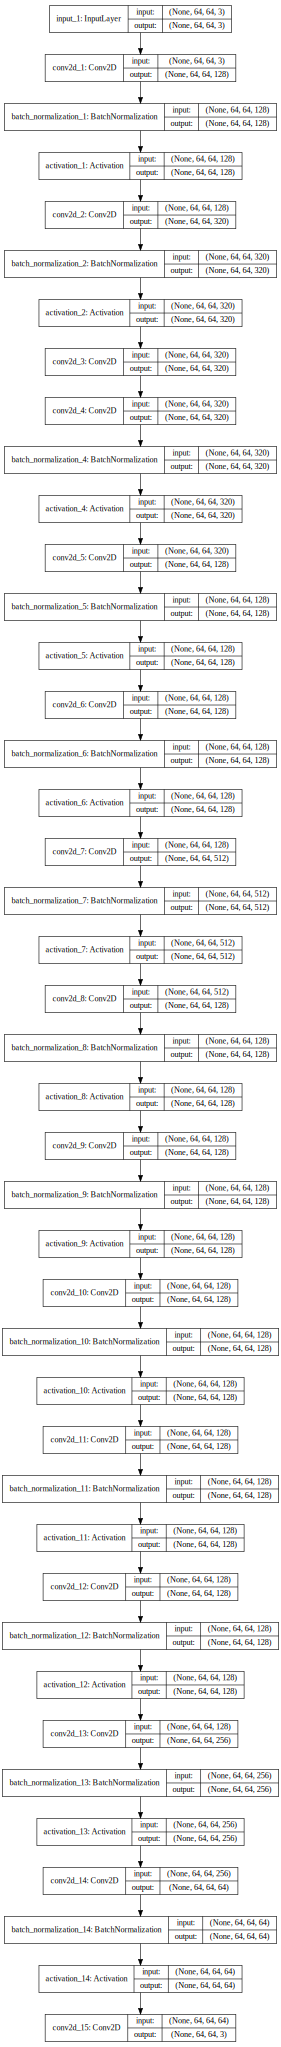

In [11]:
from keras.models import Model, load_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
SVG(model_to_dot(Adeblur_CNN, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
adam = Adam(lr= 0.00001)
Adeblur_CNN.compile(optimizer= adam, loss= 'mean_squared_error')
Adeblur_CNN.load_weights('wazir_model.h5')

In [0]:
f, ax = plt.subplots(2,10,figsize=(25,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

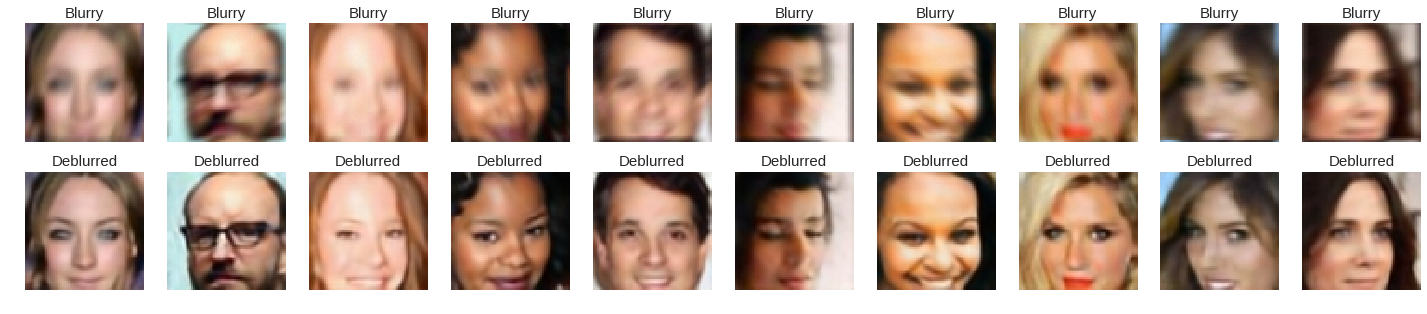

In [41]:
ADeblurred = Adeblur_CNN.predict(Blurry)
ADeblurred = np.clip(ADeblurred, 0, 255)
f, ax = plt.subplots(2,10, figsize=(25,5))
for i in range(10):
   #ax[0,i].imshow(Images[i].astype('uint8'));      ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15) IF WE SHOW THREE THEN CHANGE 0, 1, and 2 put in brackets []
    ax[0,i].imshow(Blurry[i].astype('uint8'));      ax[0,i].axis('Off'); ax[0,i].set_title('Blurry', size=15)
    ax[1,i].imshow(ADeblurred[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Deblurred', size=15)
plt.show()